In [4]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

***Projected Subgradient Method***

In [5]:
def read_data(verbose=False):

    data = pd.read_csv("all_stocks_5yr.csv")
    df = data[["date", "Name", "close"]]

    prices = df.pivot(index="date", columns="Name", values="close")
    prices = prices.dropna(axis=1)

    # with open("prices.txt", "w") as f:
    #     f.write(prices.to_string())
    #     f.close()

    returns = prices.pct_change().dropna()
    # with open("rendements.txt", "w") as f:
    #     f.write(returns.to_string())
    #     f.close()


    X = returns.values
    mu = returns.mean().values
    Sigma = returns.cov().values


    if verbose:
        print("X shape =", X.shape)
        print("mu shape =", mu.shape)
        print("Sigma shape =", Sigma.shape)
    
    return X, mu, Sigma



In [12]:
def projection_on_simplex(v):
    """
    Project a vector v onto the simplex:
        Δ = { w >= 0, sum(w) = 1 }
    """
   
    u = sorted(v, reverse=True)
    cumulative_sum = np.cumsum(u)

    thetas = (cumulative_sum - 1) / (np.arange(1, len(v) + 1))
    k = np.where(u - thetas > 0)[0].max()

    theta = (cumulative_sum[k] - 1) / (k + 1)
    w = np.maximum(v - theta, 0)

    return w

def test(): 
    v = np.array([0.9, 0.9, 0.2])
    v2 = -1 * v

    print("w1 : ", projection_on_simplex(v))
    print("w2 : ", projection_on_simplex(v2))

#test()

def sign(v):
    result = np.zeros_like(v)

    result[v > 0] = 1
    result[v < 0] = -1

    return result


def obj_f_nonSmooth(w, wprev, Sigma, mu, lam, c=0.0):

    return 0.5 * w.T @ Sigma @ w -lam * (mu @ w) + \
            c * np.sum(np.abs(w - wprev))

def projected_subgradient_method(lam, c, Sigma, mu, wprev, alpha0=1, max_iter=50000, tol= 1e-8, plot=False): 

    w = wprev
    k = 0
    if plot:
        obj_values = []
    for k in tqdm(range(max_iter)):

        if plot:
            obj_values.append(obj_f_nonSmooth(w, wprev, Sigma, mu, lam, c))

        g = Sigma @ w - lam * mu + c * np.sign(w - wprev)
        step_size = alpha0 / (k + 1)
        w_new = projection_on_simplex(w - step_size * g)
        
        if (np.linalg.norm(w_new - w) < tol):
            print(f"Converged in {k} iterations.")
            break

        w = w_new

    with open("values.txt", "w") as f:
        f.write(str(obj_values))
        f.close()


    if plot:
        plt.plot(obj_values)
        plt.xlabel("Iteration")
        
        plt.yscale("log")
        plt.ylabel("Objective value (log scale)")
        plt.title("Convergence of Projected Subgradient Method")
        plt.show()
    
    return w




    

X shape = (1258, 470)
mu shape = (470,)
Sigma shape = (470, 470)


100%|██████████| 50000/50000 [00:15<00:00, 3216.12it/s]


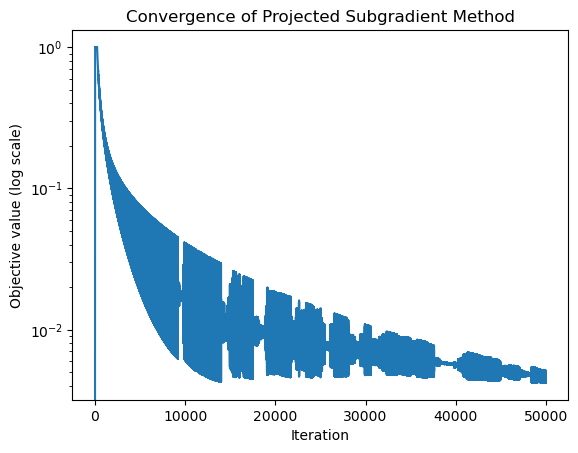

Optimal weights: [0.0021139  0.00211697 0.00212205 0.00214768 0.00211942 0.00214056
 0.00212484 0.00213239 0.00214477 0.00212405 0.00211577 0.00212708
 0.00211836 0.00213854 0.00213589 0.00213072 0.00213048 0.00213053
 0.00212153 0.00213116 0.00211633 0.00212564 0.00213943 0.00212695
 0.00212559 0.00212202 0.00213919 0.00213976 0.00213966 0.00214578
 0.00211594 0.00212645 0.00212215 0.00212179 0.00212643 0.00212433
 0.00213131 0.00212159 0.00211947 0.00212939 0.00213292 0.00214367
 0.00211577 0.00214702 0.00212973 0.0021282  0.00213835 0.00212883
 0.00211978 0.0021176  0.00212264 0.00212256 0.00214877 0.00211078
 0.00212067 0.0021293  0.00213674 0.00214039 0.00213137 0.00211273
 0.00212305 0.00211842 0.00211091 0.00213832 0.00213718 0.00212671
 0.00212418 0.0021233  0.00212604 0.00213076 0.00212619 0.00214085
 0.00210909 0.00211231 0.00211378 0.00211764 0.00211965 0.00211831
 0.00212619 0.0021128  0.00214504 0.00214688 0.00212847 0.00213
 0.00210967 0.00212584 0.00211901 0.00213228 0.0

In [13]:
X, mu, Sigma = read_data(verbose=True)
lam = 0.1
c = 1
wprev = np.ones(X.shape[1]) / X.shape[1]

w = projected_subgradient_method(lam, c, Sigma, mu, wprev, tol= 1e-8, plot=True)
print("Optimal weights:", w)
print("Sum of weights:", np.sum(w))
